Consider the “ChickWeight” data in the “datasets” package. The data contains information on the effect of diet on early growth of chicks.
a) What type of variable is Diet?

In [15]:
data(ChickWeight)
CW <- ChickWeight
# Diet variable type 
typeof(CW$Diet) 

[1] "integer"

b) Recode Diet as a factor with levels “A” and “B”. assignme.

In [16]:
#converting Diet type 
CW$Diet <- factor(CW$Diet)
typeof(CW$Diet) #interger
class(CW$Diet) #factor

#Recode Diet as a factor A,B,C,D
CW$Diet_order <- as.character(factor(CW$Diet))
CW1 <- transform(CW, Diet_order=LETTERS[Diet])
unique(CW1$Diet_order)

[1] "integer"

[1] "factor"

[1] "A" "B" "C" "D"


b) Use different visualization techniques to explore the relationships in the data Comment on your findings

[1]  0  2  4  6  8 10 12 14 16 18 20 21

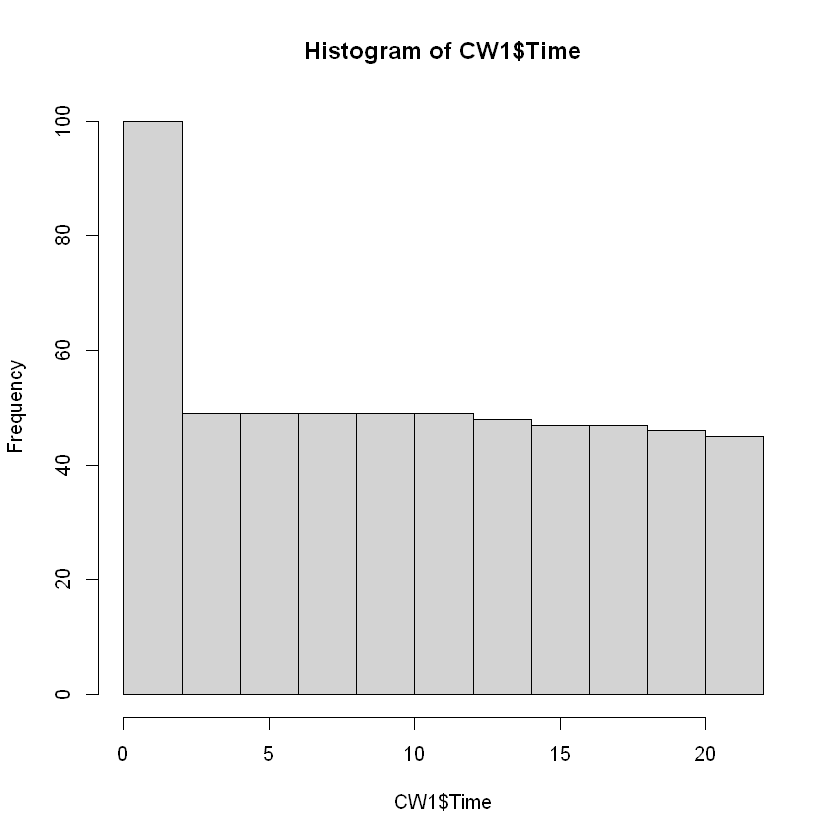

In [18]:
#Relations between the variable of dataset ChickWeight
unique(CW1$Time) 
hist(CW1$Time)


Here we can see unique values of time which are  from 0 to 21  indicates that this data frame carries the information of incubation of Chick with respect to weight and various Diet they follow during this period

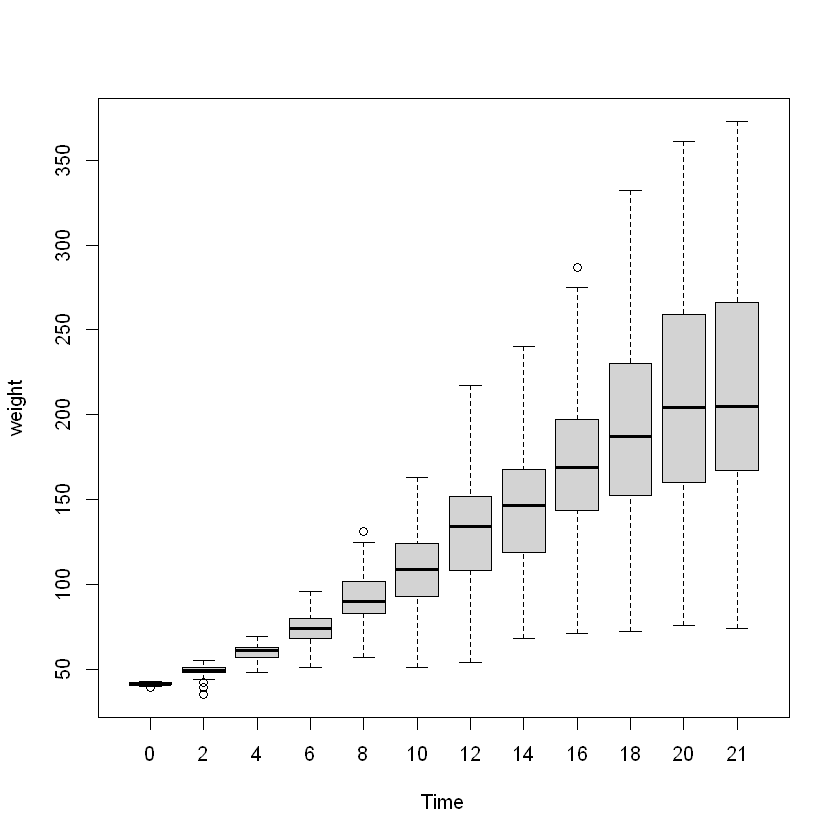

In [19]:
#relation between weight and time 
#plot(x = CW1$weight, y = CW1$Time)
boxplot(weight ~ Time, data = CW1)

In plot we can observe clear trends that with time the weight of the chick is gradually increasing

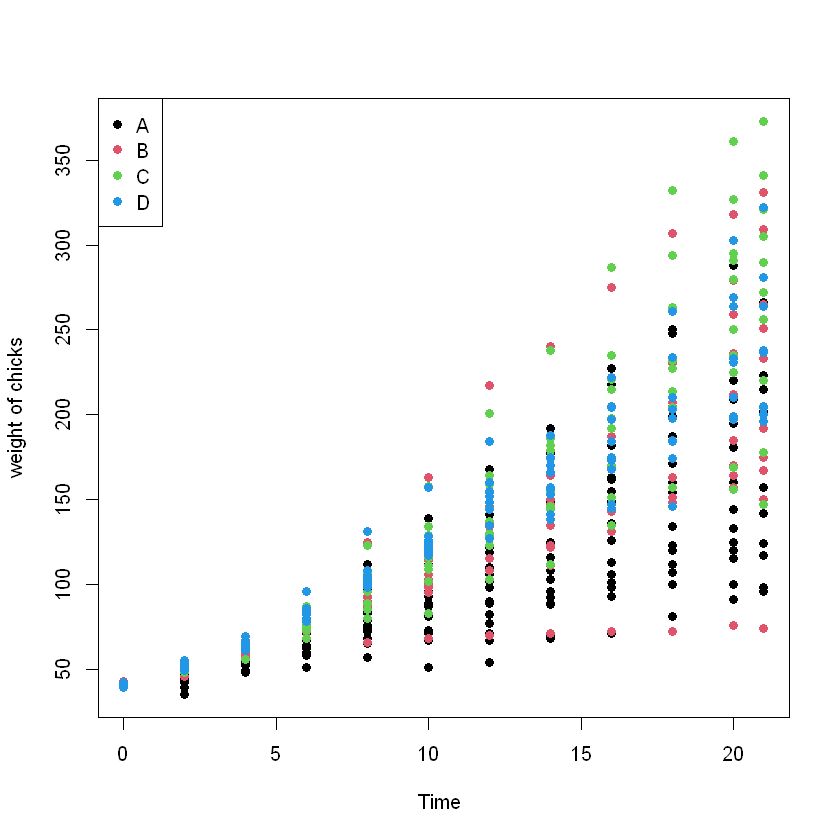

In [20]:
plot( CW1$Time, CW1$weight,pch = 19, xlab="Time ",
  ylab="weight of chicks",col=factor(CW1$Diet_order))
legend("topleft",
       legend = levels(factor(CW1$Diet_order)),
       pch = 19,
       col = factor(levels(factor(CW1$Diet_order))))

[1] 1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
50 Levels: 18 < 16 < 15 < 13 < 9 < 20 < 10 < 8 < 17 < 19 < 4 < 6 < 11 < ... < 48

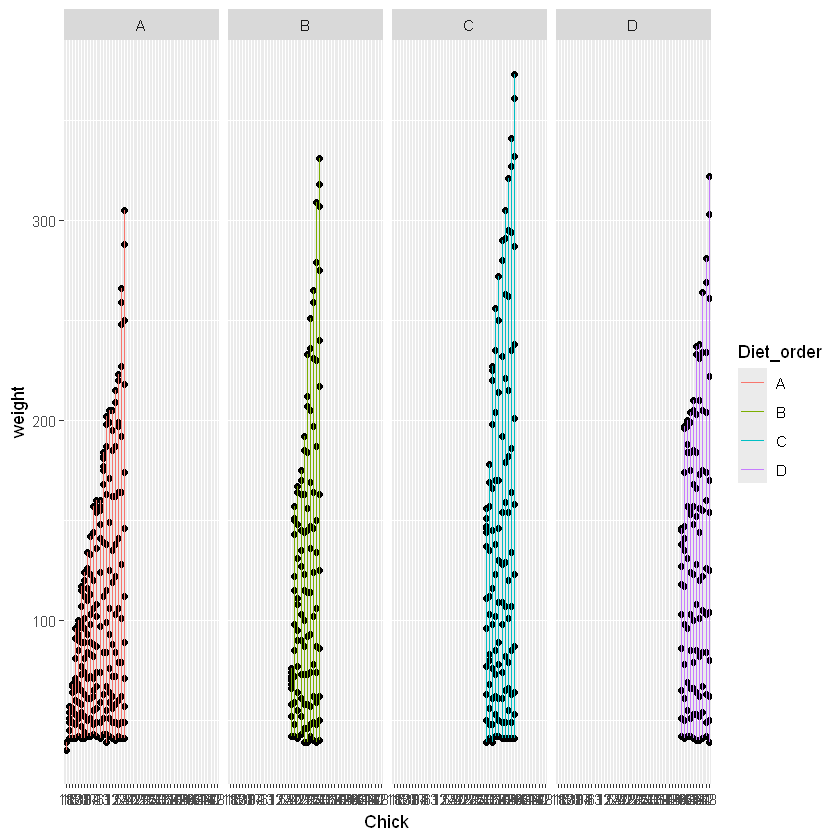

In [21]:

#relation between weight , time and diet
#total number of chicks
unique(CW1$Chick)  # 50 

library(dplyr) 
agg_tbl1 <- CW1   %>% group_by(Diet_order,Chick) %>% summarise(
                      min_weight = min(weight),
                      max_weight = max(weight),
                     .groups = 'drop'
                   )
library(ggplot2)
#arrange(agg_tbl1,Diet_order,desc(Chick))
ggplot(CW1, aes(Chick, weight)) + geom_point() + facet_grid(~ Diet_order)+ geom_line(aes(color = Diet_order))

all these 50 chicks are divided among 4 different diets  A,B,C and D . Chick and Diet variables are having only relation i.e. from 1 to 20 are under A from 21 to 30 it's B , 31 to 40 it's c and  all above 40  are under D diet .So we consider Time , Weight and Diet as primary predictors 

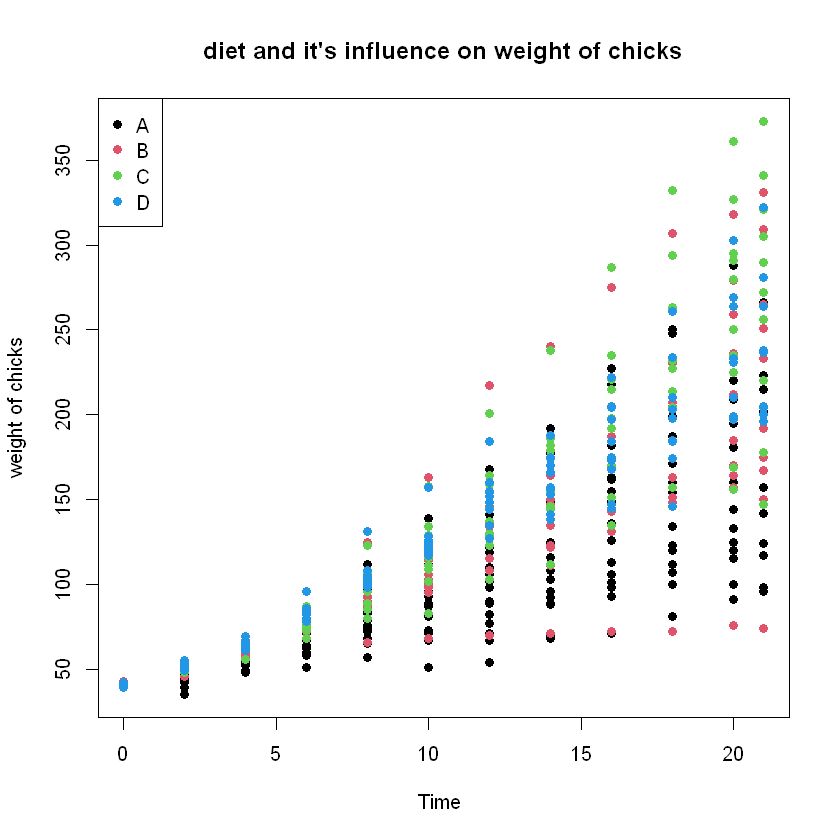

In [22]:
plot( CW1$Time, CW1$weight,pch = 19,main="diet and it's influence on weight of chicks", xlab="Time ",
  ylab="weight of chicks",col=factor(CW1$Diet_order))
legend("topleft",
       legend = levels(factor(CW1$Diet_order)),
       pch = 19,
       col = factor(levels(factor(CW1$Diet_order))))

In above plot Chicks which followed diet A haven't reached much weight by 21st day compared  with C deit chicks, their weights are much heigher. So, we can make a prediction that Chicks which follow C diet may have heigher weight in future compared to others which are following Dieat B,C and D  


e) Create a list object with data.frames for the different diets and submit it with the assignme.

In [23]:
CW2 <- CW1[CW1$Diet_order=='A',]
CW3 <- CW1[CW1$Diet_order=='B',]
CW4 <- CW1[CW1$Diet_order=='C',]
CW5 <- CW1[CW1$Diet_order=='D',]

list_object_assg <- c(CW2,CW3,CW4,CW5)
list_object_assg
typeof(list_object_assg)

$weight
  [1]  42  51  59  64  76  93 106 125 149 171 199 205  40  49  58  72  84 103
 [19] 122 138 162 187 209 215  43  39  55  67  84  99 115 138 163 187 198 202
 [37]  42  49  56  67  74  87 102 108 136 154 160 157  41  42  48  60  79 106
 [55] 141 164 197 199 220 223  41  49  59  74  97 124 141 148 155 160 160 157
 [73]  41  49  57  71  89 112 146 174 218 250 288 305  42  50  61  71  84  93
 [91] 110 116 126 134 125  42  51  59  68  85  96  90  92  93 100 100  98  41
[109]  44  52  63  74  81  89  96 101 112 120 124  43  51  63  84 112 139 168
[127] 177 182 184 181 175  41  49  56  62  72  88 119 135 162 185 195 205  41
[145]  48  53  60  65  67  71  70  71  81  91  96  41  49  62  79 101 128 164
[163] 192 227 248 259 266  41  49  56  64  68  68  67  68  41  45  49  51  57
[181]  51  54  42  51  61  72  83  89  98 103 113 123 133 142  39  35  43  48
[199]  55  62  65  71  82  88 106 120 144 157  41  47  54  58  65  73  77  89
[217]  98 107 115 117

$Time
  [1]  0  2  4  6  8 10 12 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20 21  0
 [26]  2  4  6  8 10 12 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20 21  0  2
 [51]  4  6  8 10 12 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20 21  0  2  4
 [76]  6  8 10 12 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20  0  2  4  6  8
[101] 10 12 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20 21  0  2  4  6  8 10
[126] 12 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20 21  0  2  4  6  8 10 12
[151] 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20 21  0  2  4  6  8 10 12 14
[176]  0  2  4  6  8 10 12  0  2  4  6  8 10 12 14 16 18 20 21  0  2  0  2  4  6
[201]  8 10 12 14 16 18 20 21  0  2  4  6  8 10 12 14 16 18 20 21

$Chick
  [1] 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  3 
 [26] 3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  5  5 
 [51] 5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7 
 [76] 7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9 
[101] 9  9  9  9  9  9  9  10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11
[126] 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13
[151] 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15
[176] 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 18 18 19 19 19 19
[201] 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20
50 Levels: 18 < 16 < 15 < 13 < 9 < 20 < 10 < 8 < 17 < 19 < 4 < 6 < 11 < ... < 48

$Diet
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 1 2 3 4

$Diet_order
  [1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [19] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [37] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [55] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [73] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [91] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[109] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[127] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[145] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[163] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[181] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[199] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[217] "A" "A" "A" "A"

$weight
  [1]  40  50  62  86 125 163 2

[1] "list"